# 2. Initial EDA

**Jordan Miranda**

**Course: BrainStation Data Science**

**Previous Notebook: 1. Preprocessing & Cleaning**

**Next Notebook: 3. Feature Engineering**

# Introduction 

In our first notebook ***1. Preprocessing & Cleaning*** our data was imported and cleaned in order to be prepared for EDA and potentially modelling. In this notebook we will take a closer look into our data and attempt to uncover any potential relationships amongst our features, look for potential outliers, and hopefully gain insights that will guide our next steps prior to modelling.

In order to begin we'll need to import our standard toolset and read in our data saved as a csv from the previous notebook.

In [1]:
# importing our standard tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

In [2]:
# reading in the dataset and setting our index column to the provided one 
stats_df2 = pd.read_csv("FormattedCapstoneData/stats_df2.csv", index_col=[0])
stats_df2

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,Fernando-Menegazzo,MF,Bordeaux,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,Sergio-Abad-Beyxer,MF,Levante,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,Ignazio-Abate,DFMF,Milan,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,Mohammed-Abdellaoue,FW,Hannover 96,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47
4,Yacine-Abdessadki,MF,Freiburg,2010,Bundesliga,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,DFMF,Eint Frankfurt,2020,Bundesliga,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46
27670,Martin-Zubimendi,MF,Real Sociedad,2020,La Liga,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00
27671,Martin-Odegaard,MF,Arsenal,2020,Premier League,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31
27672,Martin-Odegaard,MFFW,Real Madrid,2020,La Liga,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00


Let's check the datatypes of our features.

In [3]:
stats_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27674 entries, 0 to 27673
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player_Name  27674 non-null  object 
 1   Pos          27674 non-null  object 
 2   Squad        27674 non-null  object 
 3   Year         27674 non-null  int64  
 4   League       27674 non-null  object 
 5   Age          27674 non-null  float64
 6   Born         27674 non-null  float64
 7   MP           27674 non-null  int64  
 8   Starts       27674 non-null  int64  
 9   Min          27674 non-null  int64  
 10  Gls          27674 non-null  int64  
 11  Ast          27674 non-null  float64
 12  G-PK         27674 non-null  float64
 13  PK           27674 non-null  float64
 14  PKatt        27674 non-null  float64
 15  CrdY         27674 non-null  int64  
 16  CrdR         27674 non-null  int64  
 17  Gls_p90      27674 non-null  float64
 18  Ast_p90      27674 non-null  float64
 19  G+A_

# Exploratory Data Analysis - Categorical Columns

From above we know that only four of the columns in our dataset are currently categorical values as displayed by their `object` datatype. Let's start by looking at these columns first.

## Position Distribution

Starting at the `Pos` column, let's find out what position most players are playing in.

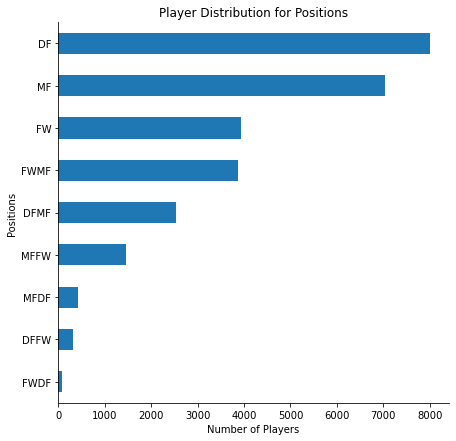

In [4]:
plt.figure()
# grouping by the position and getting the count of player names in each position
# then sorting by ascending and turning it into a horizontal barplot
stats_df2.groupby("Pos")["Player_Name"].count().sort_values(ascending=True).plot(kind="barh", figsize=(7, 7))
# labels, titles, and cleaning
plt.title("Player Distribution for Positions")
plt.ylabel("Positions")
plt.xlabel("Number of Players")
sns.despine()
plt.show()

From this chart we see that a large majority of players play as defenders (~ 8000) or midfielders (~ 7000). Between these two positions alone they make up over 15000 of the rows in our dataset which translates to approximately 54% of our data. Following these two positions we see that forwards and a combination position of forward and midfield each have approximately 4000 players in each. Given that the largest 3 positions are only a single position it could be assumed that the combination positions are when a player played in multiple positions over the course of that season, which isn't too common but does occur sometimes. 

If we plan to convert these columns into numerical values potentially through one hot encoding we may want to consider consolidating the columns down to just the three basic positions as these combinations positions start to make up less and less of the overall dataset and could add unnecessary confusion when attempting to extract insights from our modelling.

## League

The first thing I'd like to check is if all Leagues play the same number of games over the course of their seasons. I believe from watching soccer that all of the top five european leagues play the same number of games per season but let's double check.

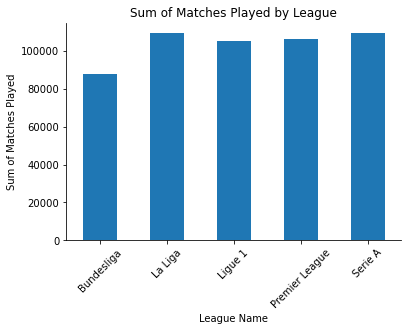

In [5]:
plt.figure()
# grouping by league, summing the number of matches played 
# and plotting into bar chart
stats_df2.groupby("League")["MP"].sum().plot(kind="bar")

# labels, titles and cleaning
plt.title("Sum of Matches Played by League")
plt.xlabel("League Name")
plt.ylabel("Sum of Matches Played")
plt.xticks(rotation=45)
sns.despine()
plt.show()

Looks like we were wrong! From the result of this bar chart and looking into this result on Google, it appears that each team in the Bundesliga (Germany's league) plays only **34 games** a season when compared to the other league's teams who play **38 games** a season. This is because the Bundesliga only has 18 teams in it so each team plays every other team twice (17x2) while in the other leagues there are 20 teams (19x2).

It's highly likely that due to the Bundesliga's reduced season, less goals are scored on average by Bundesliga players. Let's check now to see if that's true.

### Does Games Played Have an Effect on the Number of Goals Scored?

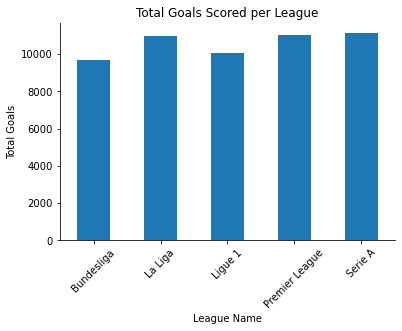

In [6]:
plt.figure()
# grouping by league, summing the number of goals
# and plotting into bar chart
stats_df2.groupby("League")["Gls"].sum().plot(kind="bar")

# labels, titles and cleaning
plt.title("Total Goals Scored per League")
plt.xlabel("League Name")
plt.ylabel("Total Goals")
plt.xticks(rotation=45)
sns.despine()
plt.show()

It does seem that despite the Bundesliga's reduced season length they don't appear to have as severe reduced goal counts as we were initially expecting. While it is below the numbers recorded in La Liga, Serie A and the Premier League, the Bundesliga is not far off from Ligue 1. Either the defense in the Bundesliga is quite poor or the forwards there are extremely good at putting balls in the back of the net!

# Exploratory Data Analysis - Numerical Columns

The first thing we'll want to do with our numerical columns is plot out the distributions for each column. In order to do this we'll need to grab only the numerical columns from our dataset.

In [10]:
# grabbing only numerical columns from datatset
numeric = stats_df2.select_dtypes(["float64", "int64"])
numeric

,Year,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,2010,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,2010,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,2010,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,2010,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47
4,2010,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,2020,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46
27670,2020,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00
27671,2020,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31
27672,2020,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00


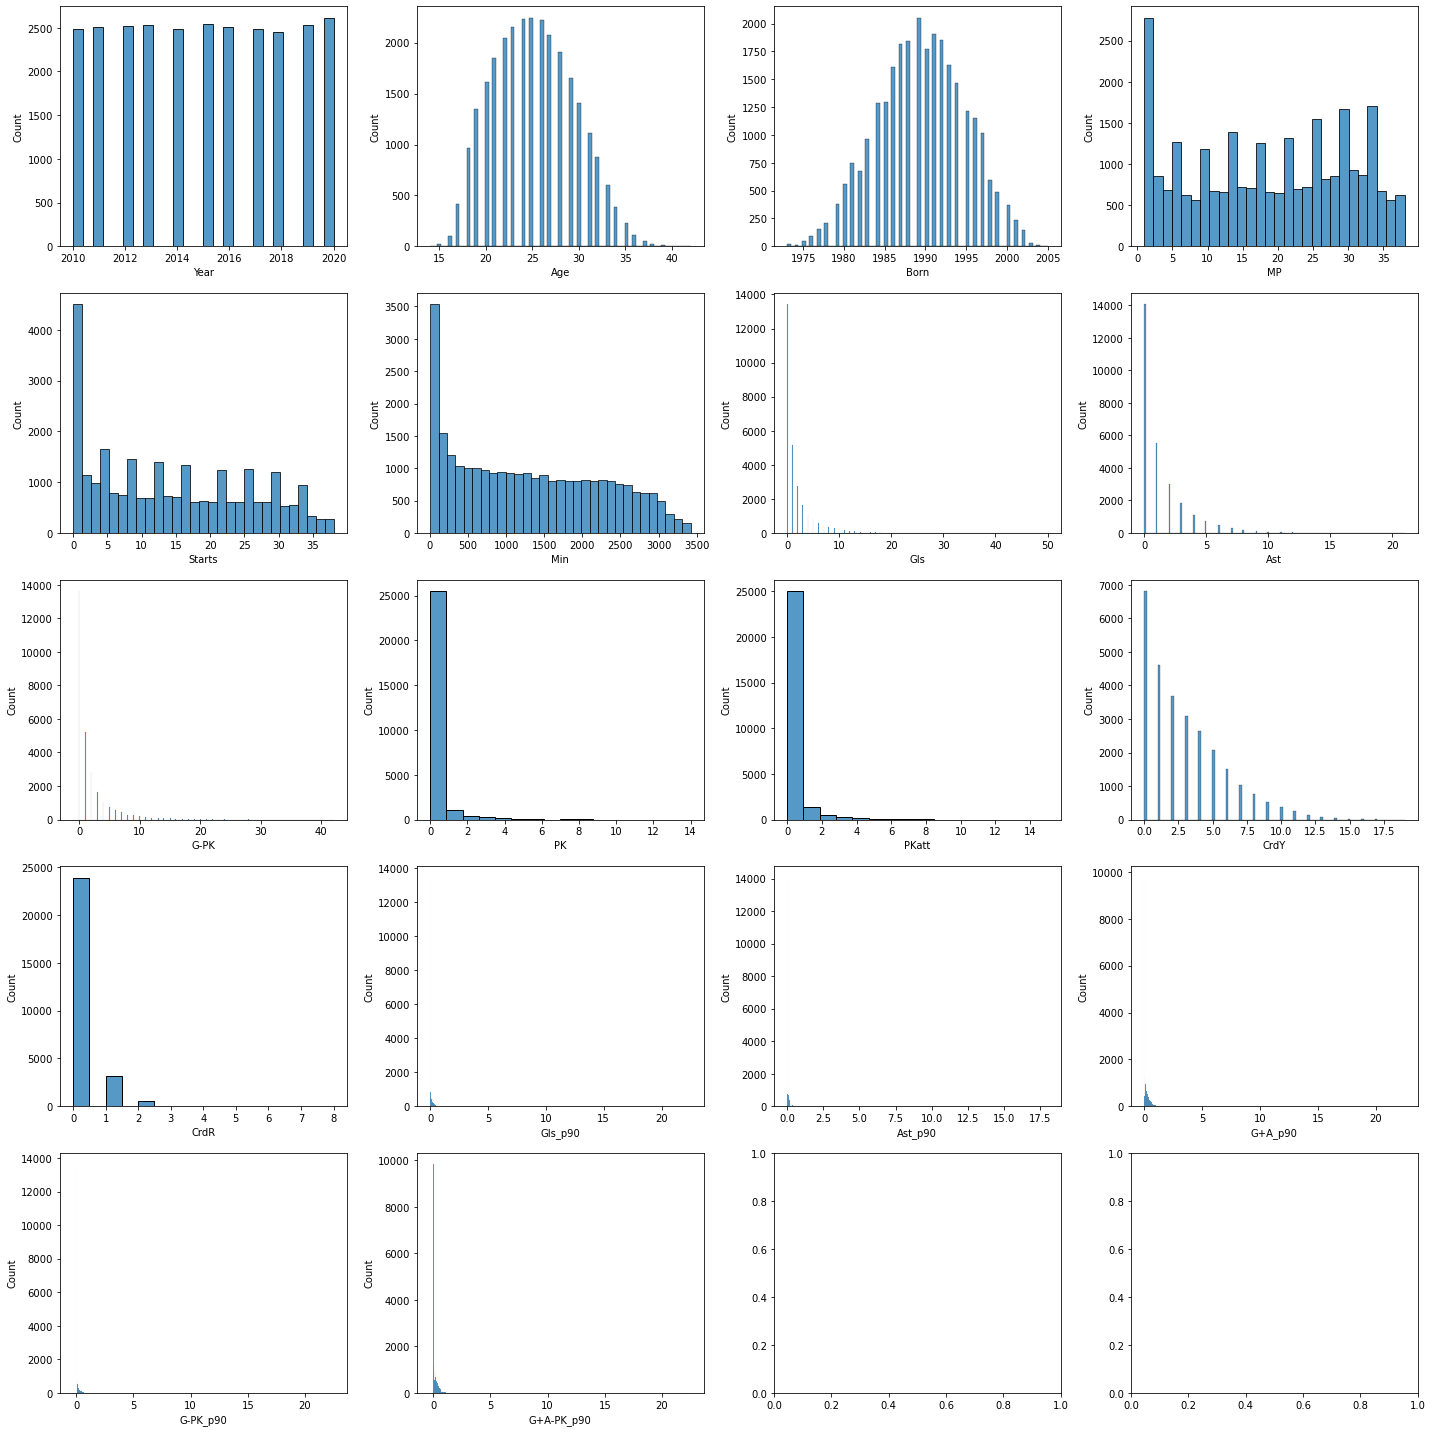

In [12]:
# creating our subplot
plt.subplots(5, 4, figsize=(20, 20))

for index, column in enumerate(numeric):
    
    # visualize distributions for each column
    plt.subplot(5, 4, index+1)
    sns.histplot(x=column, data=numeric)
    
plt.tight_layout()
plt.show()

## Year / Born / Age Distributions

Our first few columns turn our quite well. Our `Year` column has a uniform distribution which is to be expected as there's the same amount of players playing every year give or take 100. The `Age` and `Born` columns both end up being normal distributions although the `Age` column looks like it might be slightly right skewed. 

## MP / Starts / Min Distribution

The next three columns `MP`, `Starts`, and `Min` all have quite similar distributions which is to be expected as the values are inherently correlated. Both have a high number of players at the 1 value, then it quickly drops off and levels out beyond that. However, we do see these strange spikes every 2-4 values on the x-axis although this likely could be attributed to poor binning, let's quickly check using `MP`.

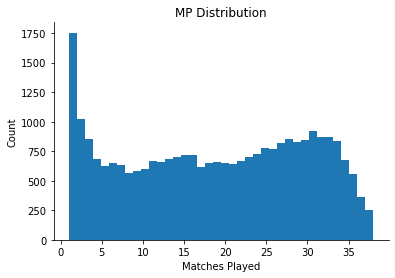

In [16]:
# quickly checking if the spikes are due to binning
plt.figure()
plt.hist(stats_df2["MP"], bins=38)

# labels, titles, cleaning
plt.title("MP Distribution")
plt.xlabel("Matches Played")
plt.ylabel("Count")
sns.despine()
plt.show()

As we correctly assumed, those spikes in the distribution are simply a result of poor binning. The distributions are as we stated earlier, high counts at the first value, quickly dropping off at the second value and then becoming very close to a uniform distribution all the way until the end of the x-axis where there is a slight dip as the x-axis ends.

## Remaining Distributions

All the other distributions for our numerical columns in the dataset seem to follow what looks like an exponential distribution. Starting out with an extremely high value at the first value and then sharply dropping as the x value becomes larger.

## `_p90` Outliers

Looking at the `_p90` columns we see that the x-axis is stretched out quite far all the way to 20 in most cases for these columns. This is quite interesting as it's completely unfathomable that any player would be able to average 20 goals or even assists per 90 minutes on the field. Let's take a closer look at the reasoning behind these column's charts having their x-axis scaled so far out. To do so we'll utilize boxplots to highlight our outliers.

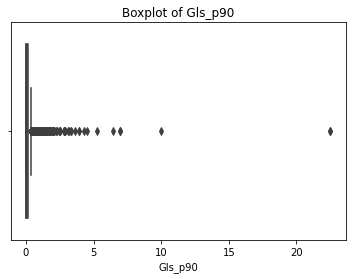

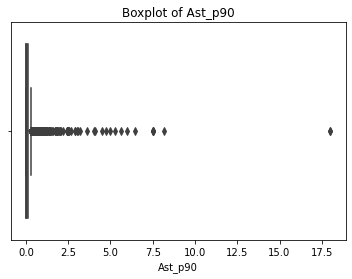

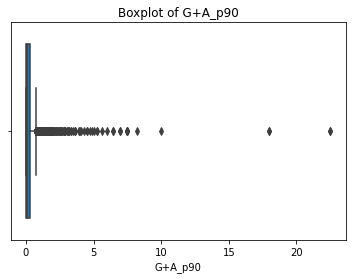

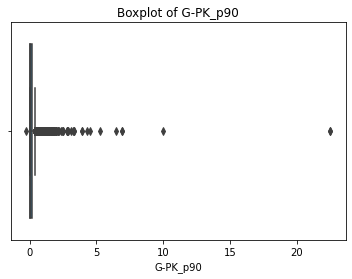

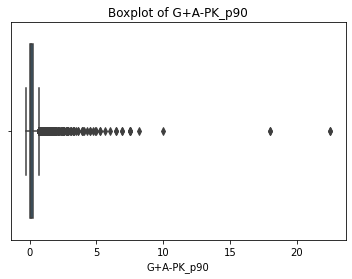

In [32]:
# creating boxplot for each of the p90 columns to see how far these outliers values go to
# listing out columns of interest
for column in ["Gls_p90", "Ast_p90", "G+A_p90", "G-PK_p90", "G+A-PK_p90"]:
    plt.figure()
    sns.boxplot(x=stats_df2[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

With these boxplots we can see that a majority of values fall into ranges that seem reasonable. However, we do get a fair amount of outliers up until the value of 5 which is tolerable. We can see now through these boxplots that the extreme values are only 1 or 2 offenders that are pushing the boundaries of what's realistic. Let's pull up these players in our dataframe to understand how this could happen.

In [21]:
# searching for players who have a goals per 90 greater than 5 (which is already quite unbelievable)
stats_df2[stats_df2["Gls_p90"] > 5]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
7220,Scott-Sinclair,FWMF,Swansea City,2012,Premier League,23.0,1989.0,1,0,14,1,0.0,1.0,0.0,0.0,0,0,6.43,0.0,6.43,6.43,6.43
7686,Levent-Aycicek,MF,Werder Bremen,2013,Bundesliga,19.0,1994.0,2,0,13,1,0.0,1.0,0.0,0.0,0,0,6.92,0.0,6.92,6.92,6.92
8762,Hicham-Khaloua,FW,Almer�a,2013,La Liga,18.0,1995.0,1,0,4,1,0.0,1.0,0.0,0.0,0,0,22.50,0.0,22.50,22.50,22.50
19106,Alexander-Meier,FW,Eint Frankfurt,2017,Bundesliga,34.0,1983.0,1,0,4,1,0.0,1.0,0.0,0.0,0,0,22.50,0.0,22.50,22.50,22.50
20980,Metehan-Guclu,FW,Paris S-G,2018,Ligue 1,19.0,1999.0,1,0,17,1,0.0,1.0,0.0,0.0,0,0,5.29,0.0,5.29,5.29,5.29
23795,Jack-Lahne,FW,Amiens,2019,Ligue 1,17.0,2001.0,1,0,9,1,0.0,1.0,0.0,0.0,0,0,10.00,0.0,10.00,10.00,10.00
23895,Losada,MFFW,Celta Vigo,2019,La Liga,17.0,2001.0,2,0,13,1,0.0,1.0,0.0,0.0,0,0,6.92,0.0,6.92,6.92,6.92


We can see now something that is likely the case for all the `_p90` columns - players with an extremely low amount of minutes played that managed to score or assist have their `_p90` metrics artificially inflated as these metrics will extrapolate from the extremely small sample size of the minutes played by the respective player.

While we can already detect that this may be a problem later in our modelling, we're going to choose to ignore it for now due to the following reason: during our feature engineering, we plan to perform a `.groupby()` on the `Player_Name` column and take the averages of all occurences of each player. When we perform the `groupby()` the player's normal seasons where they didn't register these anomaly scenarios will bring down the values in these one-off scenarios in these singular seasons.

The rationale above applies to all `_p90` metrics for the time being. We are aware of these anomaly values but through averaging across multiple seasons I believe this values will come back down to reality and reveal the player's true metrics. If it does not then we will have to consider removing players with these non-realistic values as they could affect our model's ability to grasp what true outliers (anomalies like Cristiano Ronaldo or Lionel Messi) look like.

## Total Goals vs Total Minutes Played

Let's create a scatter plot to plot out the number of goals scored vs the number of minutes played to see where most players cluster.

We'll perform a `.groupby()` on the `Player_Name` column to gather players over their entire careers (using `.sum()` to get the totals).

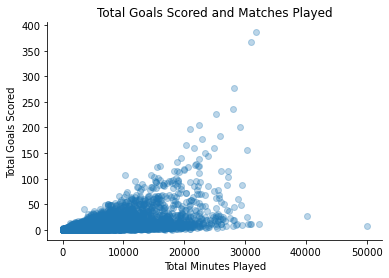

In [49]:
plt.figure()
plt.scatter(stats_df2.groupby("Player_Name")["Min"].sum(), stats_df2.groupby("Player_Name")["Gls"].sum(), alpha=0.3)

# labels, and cleaning
plt.ylabel("Total Goals Scored")
plt.xlabel("Total Minutes Played")
plt.title("Total Goals Scored and Matches Played")
sns.despine()

From this scatter plot we can see just how many players there are in this dataset with less than 100, even 50, goals over their entire careers. Even though we designated an `alpha` value of 0.3 the density in the bottom left of this visual shows just how many players fall within what can be considered a normal career. We can see that beyond 150 goals and 30000 minutes played it becomes an extremely sparse area with less than likely 10 players out of approximately 7700 total. The players in this territory are truly tail-end anomalies making up only 0.13% of the total playerbase (given our eyeballed approximates).

What this chart does highlight for us as well is that we need to factor in how absolute value metrics such as the ones used above in our scatter plot could affect our model's ability to create fitting clusters. 

Let's take an example to better highlight this problem. We have a forward (we'll call him A) who averages a goal every 4 games, giving him a `Gl_p90` value of 0.25. We have a second forward (B) who averages a goal every 2 games, giving him a `Gl_p90` value of 0.5. Forward B however is extremely injury prone and plays on average only 4 games a season, this would give him a `Gls` value of 2. Forward A however is always match-fit and somehow manages to walk away from harsh tackles unscathed. He plays all 38 games in a season, giving him a `Gls` value of 9.5. If the two players maintained their `Gl_p90` value over the course of multiple seasons we would quickly see a large disparity between the two forwards. This can become a problem as an argument can be made (rightly so) that forward B despite his injuries is a better forward than forward A due to his ability to score more goals when he does get the chance to play. 

We want our model to be able to account for these disparities in absolute value metrics by looking at relative metrics such as the `Gls_p90` as mentioned above. By having a combination of both relative and absolute value metrics, we can account and judge each player for both their pros (forward A's longevity, forward B's scoring capabilities) and their cons (forward A's worse goal scoring rate, forward B's injury rate).

# Conclusion

With this knowledge of outliers and absolute versus relative-value metrics, let's move on to our next notebook ***3. Feature Engineering***, where we can work to create more relative-value metrics and convert some of our categorical columns into numerical values.